In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
from nltk.corpus import stopwords
import os
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, mean_squared_error,r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn import model_selection
from sklearn import svm
from nltk import word_tokenize
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import plotly.express as px
import time
import nltk 
#from sklearn.metrics import plot_confusion_matrix

In [2]:
from nltk.stem import WordNetLemmatizer

In [3]:
#pip install nltk
#nltk.download('wordnet')

In [4]:
#Parent Class for Data
class data_read_write(object):
    def __init__(self):
        pass
    def __init__(self, file_link):
        self.data_frame =  pd.read_csv(file_link)
    def read_csv_file(self, file_link):
        #data_frame_read = pd.read_csv(file_link)
        #return data_frame_read
        #self.data_frame = pd.read_csv(file_link)
        return self.data_frame
    def write_to_csvfile(self, file_link):
        self.data_frame.to_csv(file_link, encoding='utf-8', index=False, header=True)
        return


In [5]:
#Child Class for Data_read_write
class generate_word_cloud(data_read_write):
    def __init__(self):
        pass
    #Child own Function
    def variance_column(self, data):
        return variance(data)
    #Polymorphism
    def word_cloud(self, data_frame_column, output_image_file):
        text = " ".join(review for review in data_frame_column)
        stopwords = set(STOPWORDS)
        stopwords.update(["subject"])
        wordcloud = WordCloud(width = 1200, height = 800, stopwords=stopwords, max_font_size = 50, margin=0, background_color = "white").generate(text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        wordcloud.to_file(output_image_file)
        return 

In [6]:
#Child Class for Data_read_write
class data_cleaning(data_read_write):
    def __init__(self):
        pass
    def message_cleaning(self, message):
            Test_punc_removed = [char for char in message if char not in string.punctuation]
            Test_punc_removed_join = ''.join(Test_punc_removed)
            Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
            final_join = ' '.join(Test_punc_removed_join_clean)
            return final_join
    
        
    def apply_to_column(self, data_column_text):
        data_processed = data_column_text.apply(self.message_cleaning)
        return data_processed

In [7]:
#Child Class for Data_read_write
class lemmetiazation(data_read_write):
    def __init__(self):
        pass
    def message_cleaning_lemmetiazation(self, message):
            word_list = nltk.word_tokenize(message)
            lemmatizer = WordNetLemmatizer()
            final_join = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
            return final_join
    
    def apply_to_text(self, data_column_text):
        data_processed = data_column_text.apply(self.message_cleaning_lemmetiazation)
        return data_processed

In [8]:
#Child Class for Data_read_write
class apply_embeddding_and_model(data_read_write):
    def __init__(self):
        pass
    def apply_count_vector(self, v_data_column):
        vectorizer = CountVectorizer(max_df=500,min_df=1,analyzer = "word",tokenizer = None,preprocessor = None,stop_words = None)
        return vectorizer.fit_transform(v_data_column)

class lemmetiazation(data_read_write):
    def __init__(self):
        pass
    def message_cleaning_lemmetiazation(self, message):
            word_list = nltk.word_tokenize(message)
            final_join = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
            return final_join
    
    def apply_to_text(self, data_column_text):
        data_processed = data_column_text.apply(self.message_cleaning_lemmetiazation)
        return data_processed

In [9]:
accuracies = {}
algo_time={}
r2_scores={}
mean_squared_errors={}
roc_auc_scores={}

In [10]:
def print_performance2(yt,clf,clf_name):
    y_pred=clf.predict(X_test)
    roc_auc_scores[clf_name]=roc_auc_score(yt,y_pred)*100
    mean_squared_errors[clf_name]=mean_squared_error(yt,y_pred)*100
    r2_scores[clf_name]=r2_score(yt,y_pred)*100
    accuracies[clf_name]=accuracy_score(yt,y_pred)*100
    print('ROC_AUC value :',roc_auc_scores[clf_name],"%",'\n')
    print("Mean Squared Error :",mean_squared_errors[clf_name],"%")
    print("\nR2 score is :",r2_scores[clf_name],"%")
    print("\nAccuracy Score :",accuracies[clf_name],"%")
    print('\nClassification Report : ','\n',classification_report(yt,y_pred))
    
    confusionmatrix=confusion_matrix(yt,y_pred)

    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusionmatrix.shape[0]):
        for j in range(confusionmatrix.shape[1]):
            ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)

In [11]:
 def print_performance(yt,clf):
        y_pred=clf.predict(X_test)
        print('ROC_AUC value :',roc_auc_score(yt,y_pred),'\n')
        print("Mean Squared Error :",mean_squared_error(yt,y_pred))
        print("\nR2 score is :",r2_score(yt,y_pred))
        print("\nAccuracy Score :",clf.score(X_train,y_train)*100,"%")
        print('\nClassification Report : ','\n',classification_report(yt,y_pred))
    
        confusionmatrix=confusion_matrix(yt,y_pred)

        fig, ax = plt.subplots(figsize=(3, 3))
        ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
        for i in range(confusionmatrix.shape[0]):
            for j in range(confusionmatrix.shape[1]):
                ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
        plt.xlabel('Predictions', fontsize=18)
        plt.ylabel('Actuals', fontsize=18)
        plt.title('Confusion Matrix', fontsize=18)
        return

In [12]:
data_obj = data_read_write("emails.csv")

In [13]:
data_frame = data_obj.read_csv_file("processed.csv")
data_frame.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
text    5728 non-null object
spam    5728 non-null int64
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [20]:
data_frame.tail()


text  spam  length
5723  Subject: re : research and development charges...     0    1189
5724  Subject: re : receipts from visit  jim ,  than...     0    1167
5725  Subject: re : enron case study update  wow ! a...     0    2131
5726  Subject: re : interest  david ,  please , call...     0    1060
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0    2331

In [21]:
data_frame.describe()

spam        length
count  5728.000000   5728.000000
mean      0.238827   1556.768680
std       0.426404   2042.649812
min       0.000000     13.000000
25%       0.000000    508.750000
50%       0.000000    979.000000
75%       0.000000   1894.250000
max       1.000000  43952.000000

In [22]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 3 columns):
text      5728 non-null object
spam      5728 non-null int64
length    5728 non-null int64
dtypes: int64(2), object(1)
memory usage: 134.3+ KB


In [14]:
data_frame.head()

text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1

In [15]:
#Visualize dataset
# Let's see which message is the most popular ham/spam message
data_frame.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
0     4360   4327  Subject: re : interviews  vince ,  no problem ...    2
1     1368   1368  Subject: fulton bank online security message  ...    1

In [16]:
# Let's get the length of the messages
data_frame['length'] = data_frame['text'].apply(len)
data_frame['length'].max()

43952

In [17]:
import plotly.graph_objects as go
spam_messages_length = data_frame[data_frame['spam']==1] 
ham_messages_length =  data_frame[data_frame['spam']==0] 
fig = go.Figure()
fig.add_trace(go.Histogram(x=ham_messages_length['length'], name='Ham'))
fig.add_trace(go.Histogram(x=spam_messages_length['length'], name='Spam'))
fig.update_traces(opacity=0.75)
fig.update_layout(title="Emails", xaxis_title="Length", yaxis_title="Frequency")
fig.show()

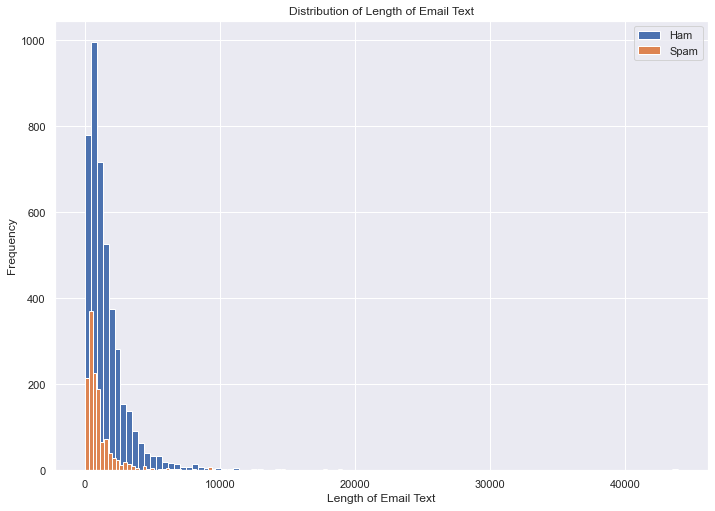

In [18]:
#data_frame['length'].plot(bins=100, kind='hist') 
#Length of characters for ham emails is more as compared to spam emails
sns.set(rc={'figure.figsize':(11.7,8.27)})
ham_messages_length =  data_frame[data_frame['spam']==0] 
spam_messages_length =  data_frame[data_frame['spam']==1]

ham_messages_length['length'].plot(bins=100, kind='hist',label = 'Ham') 
spam_messages_length['length'].plot(bins=100, kind='hist',label = 'Spam') 
#sns.distplot(ham_messages_length['length'], bins=10, norm_hist = True, label = 'Ham')
#sns.distplot(spam_messages_length['length'], bins=10, norm_hist = True, label = 'Spam')
plt.title('Distribution of Length of Email Text')
plt.xlabel('Length of Email Text')
plt.legend()


#ax = sns.distplot(ham_words_length, norm_hist = True, bins = 30, label = 'Ham')
#ax = sns.distplot(spam_words_length, norm_hist = True, bins = 30, label = 'Spam')

#plt.legend()
#plt.title('Distribution of Number of Words')
#plt.xlabel('Number of Words')
#plt.show()

In [23]:
#data_frame['spam']==0
data_frame[data_frame['spam']==0].text.values

ham_words_length = [len(word_tokenize(title)) for title in data_frame[data_frame['spam']==0].text.values]
spam_words_length = [len(word_tokenize(title)) for title in data_frame[data_frame['spam']==1].text.values]
print(max(ham_words_length))
print(max(spam_words_length))

8479
6131


In [24]:
import plotly.figure_factory as ff
lengths=[ham_words_length,spam_words_length]
lbs=['Ham','Spam']
fig = ff.create_distplot(lengths, lbs, bin_size=30)
fig.update_layout(title="Distribution of Number of Words", xaxis_title="Length", yaxis_title="")
fig.show()


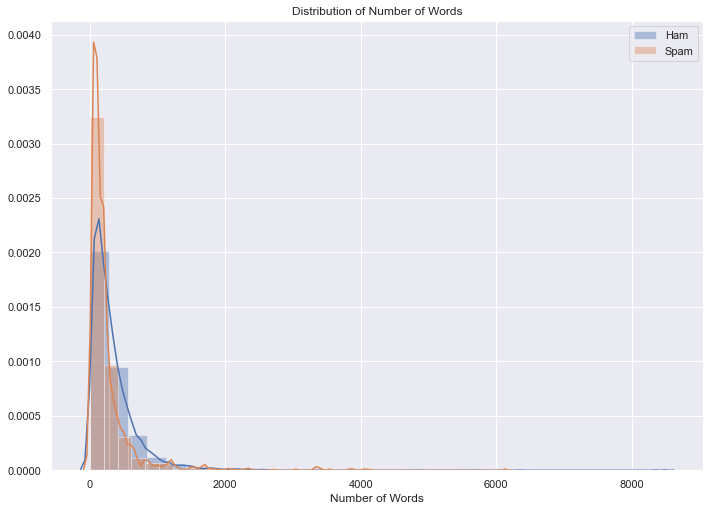

In [25]:
#There is spike in spam emails with less number of words
#Even when our dataset include 24 percent of spam emails out of total emails-
#Looks like Spam emails have less words as compared to ham emails
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.distplot(ham_words_length, norm_hist = True, bins = 30, label = 'Ham')
ax = sns.distplot(spam_words_length, norm_hist = True, bins = 30, label = 'Spam')
#ham_words_length.plot(bins=100, kind='hist',label = 'Ham') 
#spam_words_length.plot(bins=100, kind='hist',label = 'Spam')



plt.title('Distribution of Number of Words')
plt.xlabel('Number of Words')
plt.legend()
                       
plt.show()


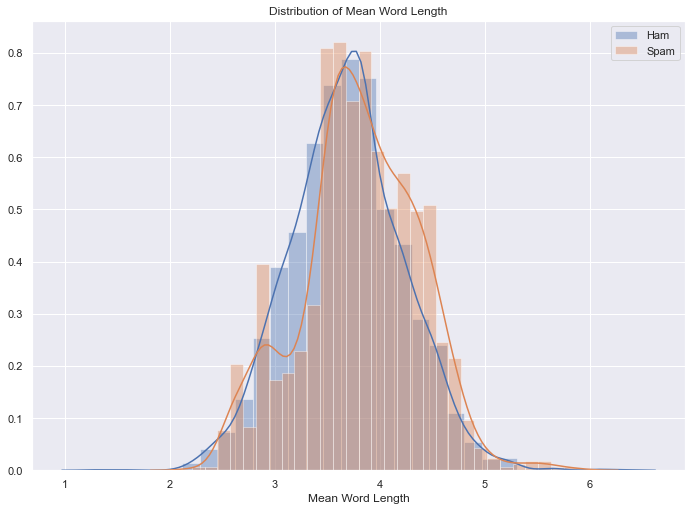

In [26]:
def mean_word_length(x):
    word_lengths = np.array([])
    for word in word_tokenize(x):
        word_lengths = np.append(word_lengths, len(word))
    return word_lengths.mean()

ham_meanword_length = data_frame[data_frame['spam']==0].text.apply(mean_word_length)
spam_meanword_length = data_frame[data_frame['spam']==1].text.apply(mean_word_length)


sns.distplot(ham_meanword_length, norm_hist = True, bins = 30, label = 'Ham')
sns.distplot(spam_meanword_length , norm_hist = True, bins = 30, label = 'Spam')
plt.title('Distribution of Mean Word Length')
plt.xlabel('Mean Word Length')
plt.legend()
plt.show()

#There is not a significant difference for the length of words used by ham and spam emails

In [27]:
import plotly.figure_factory as ff
mean_lengths=[ham_meanword_length,spam_meanword_length]
lbs=['Ham','Spam']
fig = ff.create_distplot(mean_lengths, lbs,bin_size=.2)
fig.update_layout(title="Distribution of Mean Word Length", xaxis_title="Mean Word Length", yaxis_title="")

fig.show()

Ham Mean: 0.278
Spam Mean: 0.281


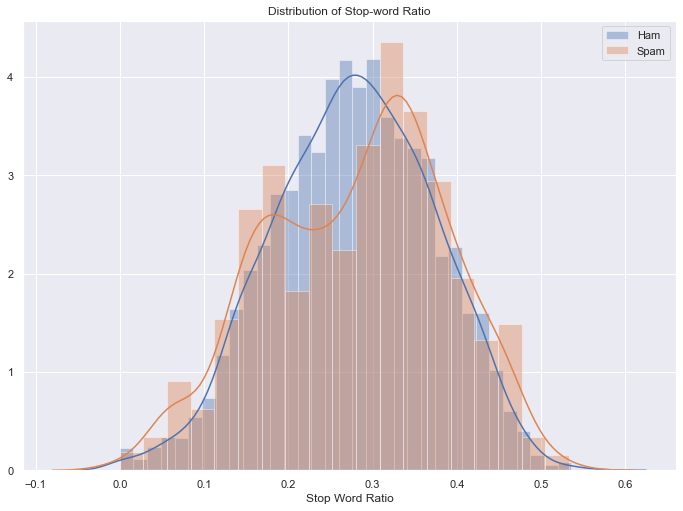

In [28]:
#Checking ratio of stop words
#Both spam and ham email contain stopwords
#All Spam emails contain stop words with a mean of 0.281
#All Ham emails contain stop words with a mean of 0.278
#But we can see from the graph, spam email contain high stop words ratio as compared to ham emails.
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
        
def stop_words_ratio(x):
    num_total_words = 0
    num_stop_words = 0
    for word in word_tokenize(x):
        if word in stop_words:
            num_stop_words += 1
        num_total_words += 1 
    return num_stop_words/num_total_words


ham_stopwords = data_frame[data_frame['spam']==0].text.apply(stop_words_ratio)
spam_stopwords = data_frame[data_frame['spam']==1].text.apply(stop_words_ratio)


sns.distplot(ham_stopwords, norm_hist = True, label = 'Ham')
sns.distplot(spam_stopwords,  label = 'Spam')

print('Ham Mean: {:.3f}'.format(ham_stopwords.values.mean()))
print('Spam Mean: {:.3f}'.format(spam_stopwords.values.mean()))
plt.title('Distribution of Stop-word Ratio')
plt.xlabel('Stop Word Ratio')
plt.legend()




In [29]:
stopwords=[ham_stopwords,spam_meanword_length]
lbs=['Ham','Spam']
fig = ff.create_distplot(stopwords, lbs, bin_size=.2)
#fig.update_layout(width=600, height=400,bargap=0.01)
fig.update_layout(title="Distribution of Stop-word Ratio", xaxis_title="Stop Word Ratio ", yaxis_title="")

fig.show()

In [30]:
spam_stopwords

0       0.230769
1       0.277778
2       0.397727
3       0.191919
4       0.396226
5       0.176471
6       0.340962
7       0.453608
8       0.155738
9       0.453608
10      0.224490
11      0.453608
12      0.434524
13      0.319436
14      0.386555
15      0.350254
16      0.295455
17      0.143885
18      0.071429
19      0.302469
20      0.391892
21      0.299270
22      0.289062
23      0.383333
24      0.411765
25      0.341232
26      0.398876
27      0.195402
28      0.188889
29      0.453608
          ...   
1338    0.294574
1339    0.144703
1340    0.453608
1341    0.221477
1342    0.177966
1343    0.319061
1344    0.136691
1345    0.338028
1346    0.392405
1347    0.331818
1348    0.166667
1349    0.307692
1350    0.354918
1351    0.147727
1352    0.400000
1353    0.291513
1354    0.194444
1355    0.327586
1356    0.442574
1357    0.058824
1358    0.338462
1359    0.366627
1360    0.220779
1361    0.416667
1362    0.150485
1363    0.342105
1364    0.365854
1365    0.4375

In [31]:
from nltk.corpus import stopwords
data_clean_obj = data_cleaning()
# Let's test the newly added function
#data_frame['clean_text'] = data_frame['text'].apply(message_cleaning)
#data_frame['clean_text'] = data_frame['text'].apply(data_clean_obj.message_cleaning)
data_frame['clean_text'] = data_clean_obj.apply_to_column(data_frame['text'])

In [32]:
lem=lemmetiazation()
data_frame['clean_text']=lem.apply_to_text(data_frame['text'])

Spam percentage = 23.88268156424581 %
Ham percentage = 76.11731843575419 %


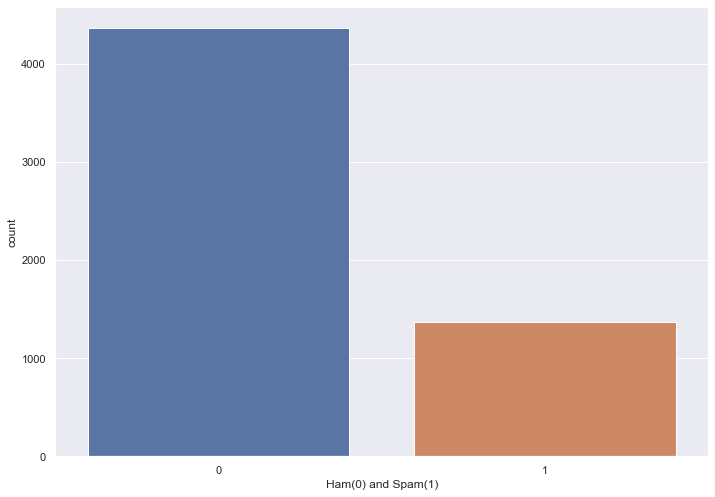

In [33]:
# Let's divide the messages into spam and ham
ham = data_frame[data_frame['spam']==0]
spam = data_frame[data_frame['spam']==1]
spam['length'].plot(bins=60, kind='hist') 
ham['length'].plot(bins=60, kind='hist') 
data_frame['Ham(0) and Spam(1)'] = data_frame['spam']
print( 'Spam percentage =', (len(spam) / len(data_frame) )*100,"%")
print( 'Ham percentage =', (len(ham) / len(data_frame) )*100,"%")
sns.countplot(data_frame['Ham(0) and Spam(1)'], label = "Count") 

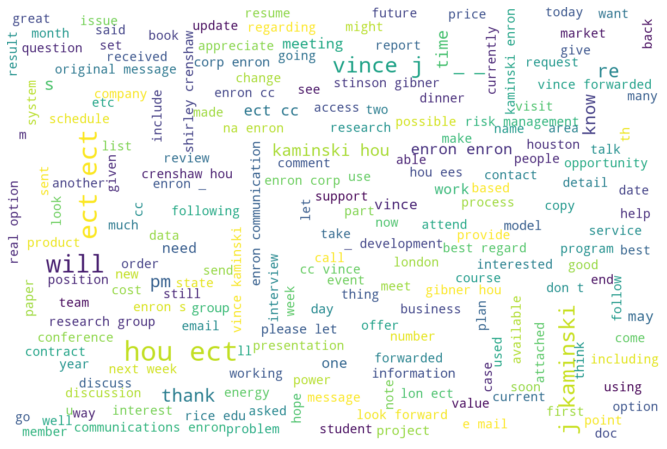

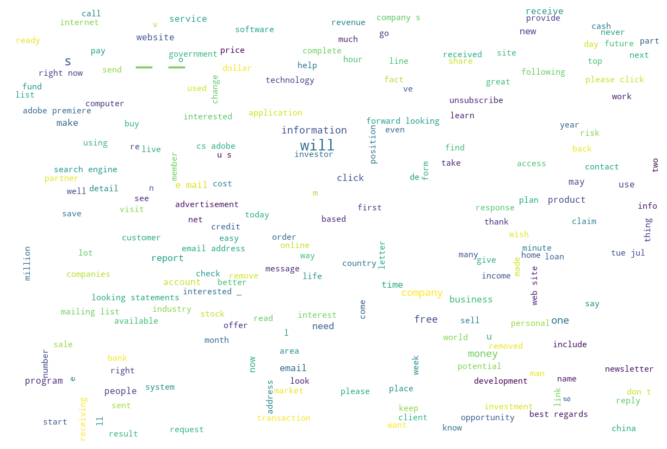

In [34]:
word_cloud_obj = generate_word_cloud()
word_cloud_obj.word_cloud(ham["text"], "ham_word_cloud.png")
word_cloud_obj.word_cloud(spam["text"], "spam_word_cloud.png")


In [35]:
data_frame.head()

text  spam  length  \
0  Subject: naturally irresistible your corporate...     1    1484   
1  Subject: the stock trading gunslinger  fanny i...     1     598   
2  Subject: unbelievable new homes made easy  im ...     1     448   
3  Subject: 4 color printing special  request add...     1     500   
4  Subject: do not have money , get software cds ...     1     235   

                                          clean_text  Ham(0) and Spam(1)  
0  Subject : naturally irresistible your corporat...                   1  
1  Subject : the stock trading gunslinger fanny i...                   1  
2  Subject : unbelievable new home made easy im w...                   1  
3  Subject : 4 color printing special request add...                   1  
4  Subject : do not have money , get software cd ...                   1

In [36]:
data_obj.data_frame.head()

text  spam  length  \
0  Subject: naturally irresistible your corporate...     1    1484   
1  Subject: the stock trading gunslinger  fanny i...     1     598   
2  Subject: unbelievable new homes made easy  im ...     1     448   
3  Subject: 4 color printing special  request add...     1     500   
4  Subject: do not have money , get software cds ...     1     235   

                                          clean_text  Ham(0) and Spam(1)  
0  Subject : naturally irresistible your corporat...                   1  
1  Subject : the stock trading gunslinger fanny i...                   1  
2  Subject : unbelievable new home made easy im w...                   1  
3  Subject : 4 color printing special request add...                   1  
4  Subject : do not have money , get software cd ...                   1

In [37]:
data_obj.write_to_csvfile("processed_file.csv")

from nltk.stem import WordNetLemmatizer 

lem=lemmetiazation()
data_frame['clean_text']=lem.apply_to_text(data_frame['text'])

In [38]:
#APPLY COUNT VECTORIZER TO OUR MESSAGES LIST

# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(stop_words='english')
#cv_object = apply_embeddding_and_model()
#spamham_countvectorizer = cv_object.apply_count_vector(data_frame['clean_text'])
vectorizer.fit(data_frame['clean_text'])
# summarize
print(vectorizer.vocabulary_)
# encode document
spamham_countvectorizer = vectorizer.transform(data_frame['clean_text'])

{'subject': 29848, 'naturally': 21660, 'irresistible': 17440, 'corporate': 9445, 'identity': 16388, 'lt': 19608, 'really': 25895, 'hard': 15449, 'recollect': 26011, 'company': 8759, 'market': 20090, 'suqgestions': 30085, 'information': 16893, 'isoverwhelminq': 17485, 'good': 14911, 'catchy': 7635, 'logo': 19433, 'stylish': 29829, 'statlonery': 29511, 'outstanding': 23026, 'website': 33237, 'make': 19884, 'task': 30490, 'easier': 11772, 'promise': 25078, 'havinq': 15551, 'ordered': 22818, 'iogo': 17365, 'automaticaily': 5571, 'world': 33719, 'ieader': 16404, 'isguite': 17464, 'ciear': 8197, 'product': 24986, 'effective': 11961, 'business': 7178, 'organization': 22853, 'practicable': 24619, 'aim': 4279, 'hotat': 16088, 'nowadays': 22228, 'marketing': 20097, 'effort': 11974, 'list': 19287, 'clear': 8355, 'benefit': 6168, 'creativeness': 9654, 'hand': 15379, 'original': 22874, 'specially': 29130, 'reflect': 26153, 'distinctive': 11149, 'image': 16506, 'convenience': 9311, 'stationery': 295

In [39]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


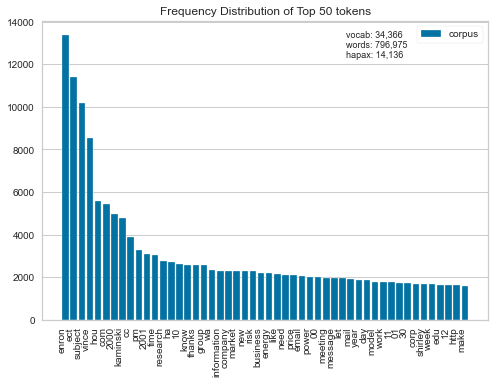

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies

features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(spamham_countvectorizer)
visualizer.show()

In [41]:
#Separating Descriptive and Target Feature 
X = spamham_countvectorizer
label = data_frame['spam'].values
y = label

In [42]:
accuracies={}

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# LOGISTIC REGRESSION

LOGISTIC REGRESSION


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



ROC_AUC value : 99.34528202424882 % 

Mean Squared Error : 0.6108202443280977 %

R2 score is : 96.6169741697417 %

Accuracy Score : 99.3891797556719 %

Classification Report :  
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       875
           1       0.98      0.99      0.99       271

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



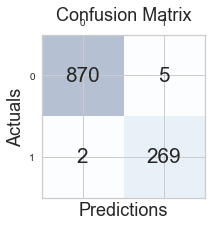

In [44]:
from sklearn.linear_model import LogisticRegression
print("LOGISTIC REGRESSION")
start = time.time()
lr = LogisticRegression()
lr.fit(X_train, y_train)
end = time.time()
print_performance2(y_test,lr,'LOGISTIC REGRESSION')
algo_time['LOGISTIC REGRESSION']=end-start

In [87]:
from sklearn.model_selection import cross_val_score

lr_scores=cross_val_score(lr, X, y, cv=5,scoring='accuracy')
lr_scores

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



array([0.9895288 , 0.9904014 , 0.991274  , 0.99213974, 0.98951965])

# KNN 

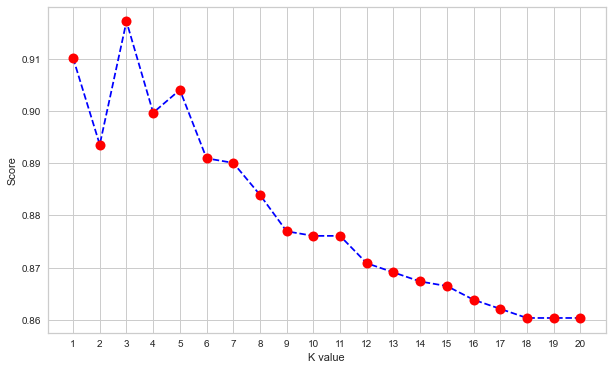

Maximum KNN Score is 91.710%


In [45]:
from sklearn.neighbors import KNeighborsClassifier
# try ro find best k value
scoreList = []
for i in range(1,21):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,21), scoreList, color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=10)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
#accuracies['KNN'] = acc
print("Maximum KNN Score is {:.3f}%".format(acc))

K-NEAREST NEIGHBOURS
ROC_AUC value : 84.6374275171323 % 

Mean Squared Error : 8.289703315881326 %

R2 score is : 54.087506589351605 %

Accuracy Score : 91.71029668411867 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       875
           1       0.92      0.71      0.80       271

    accuracy                           0.92      1146
   macro avg       0.92      0.85      0.88      1146
weighted avg       0.92      0.92      0.91      1146



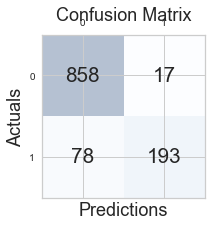

In [46]:
print("K-NEAREST NEIGHBOURS")
start = time.time()
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
end = time.time()
print_performance2(y_test,knn,'K-NEAREST NEIGHBOURS')
algo_time['K-NEAREST NEIGHBOURS']=end-start

In [86]:
knn_scores=cross_val_score(knn, X, y, cv=5,scoring='accuracy')
knn_scores

array([0.91099476, 0.92233857, 0.91273997, 0.90655022, 0.9231441 ])

# RANDOM FOREST TREE

RANDOM FOREST TREE


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



ROC_AUC value : 94.16615709014232 % 

Mean Squared Error : 2.8795811518324608 %

R2 score is : 84.05144965735371 %

Accuracy Score : 97.12041884816755 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       875
           1       0.99      0.89      0.94       271

    accuracy                           0.97      1146
   macro avg       0.98      0.94      0.96      1146
weighted avg       0.97      0.97      0.97      1146



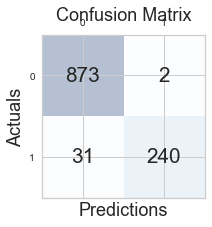

In [47]:
from sklearn.ensemble import RandomForestClassifier
print("RANDOM FOREST TREE")
start = time.time()
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
end = time.time()
print_performance2(y_test,rfc,'RANDOM FOREST TREE')
algo_time['RANDOM FOREST TREE']=end-start

In [85]:
rf_scores=cross_val_score(rfc, X, y, cv=5,scoring='accuracy')
rf_scores

array([0.96073298, 0.97120419, 0.96596859, 0.9650655 , 0.96943231])

# GRADIENT BOOSTING CLASSIFER

GRADIENT BOOSTING CLASSIFER
ROC_AUC value : 95.98017923036373 % 

Mean Squared Error : 2.4432809773123907 %

R2 score is : 86.4678966789668 %

Accuracy Score : 97.55671902268762 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       875
           1       0.97      0.93      0.95       271

    accuracy                           0.98      1146
   macro avg       0.97      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146



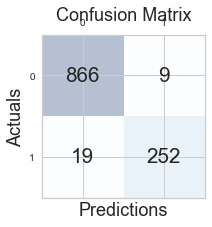

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
start = time.time()
GBR = GradientBoostingClassifier()
GBR.fit(X_train, y_train)
print("GRADIENT BOOSTING CLASSIFER")
end = time.time()
print_performance2(y_test,GBR,'Gradient Boosting Classifier')
algo_time['GRADIENT BOOSTING CLASSIFER']=end-start

In [84]:
gbr_scores=cross_val_score(GBR, X, y, cv=5,scoring='accuracy')
gbr_scores

array([0.96596859, 0.97033159, 0.97120419, 0.97030568, 0.97729258])

# DECISION TREE

DECISION TREE
ROC_AUC value : 95.93125988402743 % 

Mean Squared Error : 3.4904013961605584 %

R2 score is : 80.66842382709541 %

Accuracy Score : 96.50959860383944 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       875
           1       0.91      0.95      0.93       271

    accuracy                           0.97      1146
   macro avg       0.95      0.96      0.95      1146
weighted avg       0.97      0.97      0.97      1146



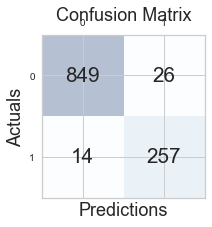

In [49]:
from sklearn import tree
start = time.time()
d_tree = tree.DecisionTreeClassifier(random_state=42)
d_tree.fit(X_train, y_train)
print("DECISION TREE")
end = time.time()
print_performance2(y_test,d_tree,'Decision tree')
algo_time['DECISION TREE']=end-start

In [83]:
dt_scores=cross_val_score(d_tree, X, y, cv=5,scoring='accuracy')
dt_scores

array([0.96858639, 0.95462478, 0.96684119, 0.95982533, 0.9650655 ])

# NAIVE BAYES

MULTINOMIAL NAIVE BAYES
ROC_AUC value : 99.05956773853454 % 

Mean Squared Error : 1.0471204188481675 %

R2 score is : 94.20052714812861 %

Accuracy Score : 98.95287958115183 %

Classification Report :  
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       875
           1       0.96      0.99      0.98       271

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



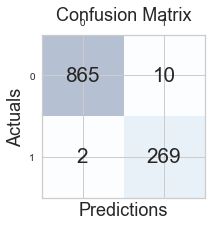

In [50]:
print("MULTINOMIAL NAIVE BAYES")
start = time.time()
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)
end = time.time()
print_performance2(y_test,NB_classifier,'NAIVE BAYES')
algo_time['MULTINOMIAL NAIVE BAYES']=end-start

In [81]:
NB_scores=cross_val_score(NB_classifier, X, y, cv=5,scoring='accuracy')
NB_scores

array([0.9886562 , 0.9895288 , 0.9904014 , 0.98689956, 0.99039301])

# SVM 

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVM
ROC_AUC value : 53.13653136531366 % 

Mean Squared Error : 22.164048865619545 %

R2 score is : -22.755508697944116 %

Accuracy Score : 77.83595113438045 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.78      1.00      0.87       875
           1       1.00      0.06      0.12       271

    accuracy                           0.78      1146
   macro avg       0.89      0.53      0.50      1146
weighted avg       0.83      0.78      0.69      1146



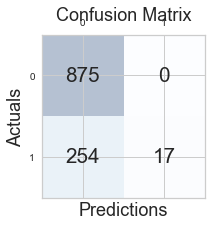

In [51]:
from sklearn.svm import LinearSVC
from sklearn import svm
start = time.time()
svm=svm.SVC(probability=True)
#svm = LinearSVC(random_state=0, tol=1e-5)
svm.fit(X_train, y_train.ravel()) 
print("SVM")
end = time.time()
print_performance2(y_test,svm,'SVM')
algo_time['SVM']=end-start

In [79]:
SVM_scores=cross_val_score(svm, X, y, cv=5,scoring='accuracy')
SVM_scores

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



array([0.77574171, 0.76876091, 0.76701571, 0.7720524 , 0.77030568])

In [88]:
data = {'LR KFOLD':lr_scores , 'KNN KFOLD': knn_scores,'RANDOM FOREST KFOLD':rf_scores,'DECISION TREE KFOLD': dt_scores,'NAIVE BAYES KFOLD':NB_scores,'SVM KFOLD':SVM_scores}
# Create DataFrame.
df_scores = pd.DataFrame(data)
# Print the output.
df_scores.head()

LR KFOLD  KNN KFOLD  RANDOM FOREST KFOLD  DECISION TREE KFOLD  \
0  0.989529   0.910995             0.960733             0.968586   
1  0.990401   0.922339             0.971204             0.954625   
2  0.991274   0.912740             0.965969             0.966841   
3  0.992140   0.906550             0.965066             0.959825   
4  0.989520   0.923144             0.969432             0.965066   

   NAIVE BAYES KFOLD  SVM KFOLD  
0           0.988656   0.775742  
1           0.989529   0.768761  
2           0.990401   0.767016  
3           0.986900   0.772052  
4           0.990393   0.770306

In [92]:
df_scores.describe()

LR KFOLD  KNN KFOLD  RANDOM FOREST KFOLD  DECISION TREE KFOLD  \
count  5.000000   5.000000             5.000000             5.000000   
mean   0.990573   0.915154             0.966481             0.962989   
std    0.001137   0.007291             0.004072             0.005711   
min    0.989520   0.906550             0.960733             0.954625   
25%    0.989529   0.910995             0.965066             0.959825   
50%    0.990401   0.912740             0.965969             0.965066   
75%    0.991274   0.922339             0.969432             0.966841   
max    0.992140   0.923144             0.971204             0.968586   

       NAIVE BAYES KFOLD  SVM KFOLD  
count           5.000000   5.000000  
mean            0.989176   0.770775  
std             0.001463   0.003343  
min             0.986900   0.767016  
25%             0.988656   0.768761  
50%             0.989529   0.770306  
75%             0.990393   0.772052  
max             0.990401   0.775742

In [93]:
def ranking_model(df_scores):
    ranking = pd.DataFrame(columns=df_scores.columns)
    for i in range(df_scores.shape[0]):
        ranking.loc[i, df_scores.iloc[i].rank(ascending=False).index]=df_scores.iloc[i].rank(ascending=False)
    return ranking

In [89]:
from scipy import stats
stats.friedmanchisquare(df_scores['LR KFOLD'],df_scores['KNN KFOLD'],df_scores['RANDOM FOREST KFOLD'],df_scores['DECISION TREE KFOLD'],df_scores['NAIVE BAYES KFOLD'],df_scores['SVM KFOLD'])

FriedmanchisquareResult(statistic=23.85714285714286, pvalue=0.00023127454328463636)

In [96]:
df_ranks=ranking_model(df_scores)
df_ranks

LR KFOLD  KNN KFOLD  RANDOM FOREST KFOLD  DECISION TREE KFOLD  \
0       1.0        5.0                  4.0                  3.0   
1       1.0        5.0                  3.0                  4.0   
2       1.0        5.0                  4.0                  3.0   
3       1.0        5.0                  3.0                  4.0   
4       2.0        5.0                  3.0                  4.0   

   NAIVE BAYES KFOLD  SVM KFOLD  
0                2.0        6.0  
1                2.0        6.0  
2                2.0        6.0  
3                2.0        6.0  
4                1.0        6.0

In [99]:
df_ranks.sum(axis=0) 

LR KFOLD                6.0
KNN KFOLD              25.0
RANDOM FOREST KFOLD    17.0
DECISION TREE KFOLD    18.0
NAIVE BAYES KFOLD       9.0
SVM KFOLD              30.0
dtype: float64

AS LR_FOLD GOT THE LEAST RANK SUM IT SHOWS THE LOGISTIC REGRESSION ALGORITHM IS THE BEST COMPARED TO THE REST

In [52]:
import plotly.express as px
fig = px.bar(x=list(accuracies.keys()), y=list(accuracies.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="Accuracy Comparision", xaxis_title="Model", yaxis_title="Accuracy")
fig.show()

In [53]:
fig = px.bar(x=list(algo_time.keys()), y=list(algo_time.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="Algo Time Comparision", xaxis_title="Model", yaxis_title="")
fig.show()

In [54]:
import plotly.express as px
fig = px.bar(x=list(r2_scores.keys()), y=list(r2_scores.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="R2 Scores Comparision", xaxis_title="Model", yaxis_title="R2 Score")
fig.show()

In [55]:
fig = px.bar(x=list(roc_auc_scores.keys()), y=list(roc_auc_scores.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="ROC AUC Score Comparision", xaxis_title="Model", yaxis_title="")
fig.show()

In [56]:
import plotly.graph_objects as go
Algos=list(roc_auc_scores.keys())

fig = go.Figure(data=[
    go.Bar(name='Accuracies', x=Algos, y=list(accuracies.values())),
    go.Bar(name='R2 scores', x=Algos, y=list(r2_scores.values())),
    go.Bar(name='Mean Squared Errors', x=Algos, y=list(mean_squared_errors.values())),
    go.Bar(name='ROC Auc Scores', x=Algos, y=list(roc_auc_scores.values()))
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

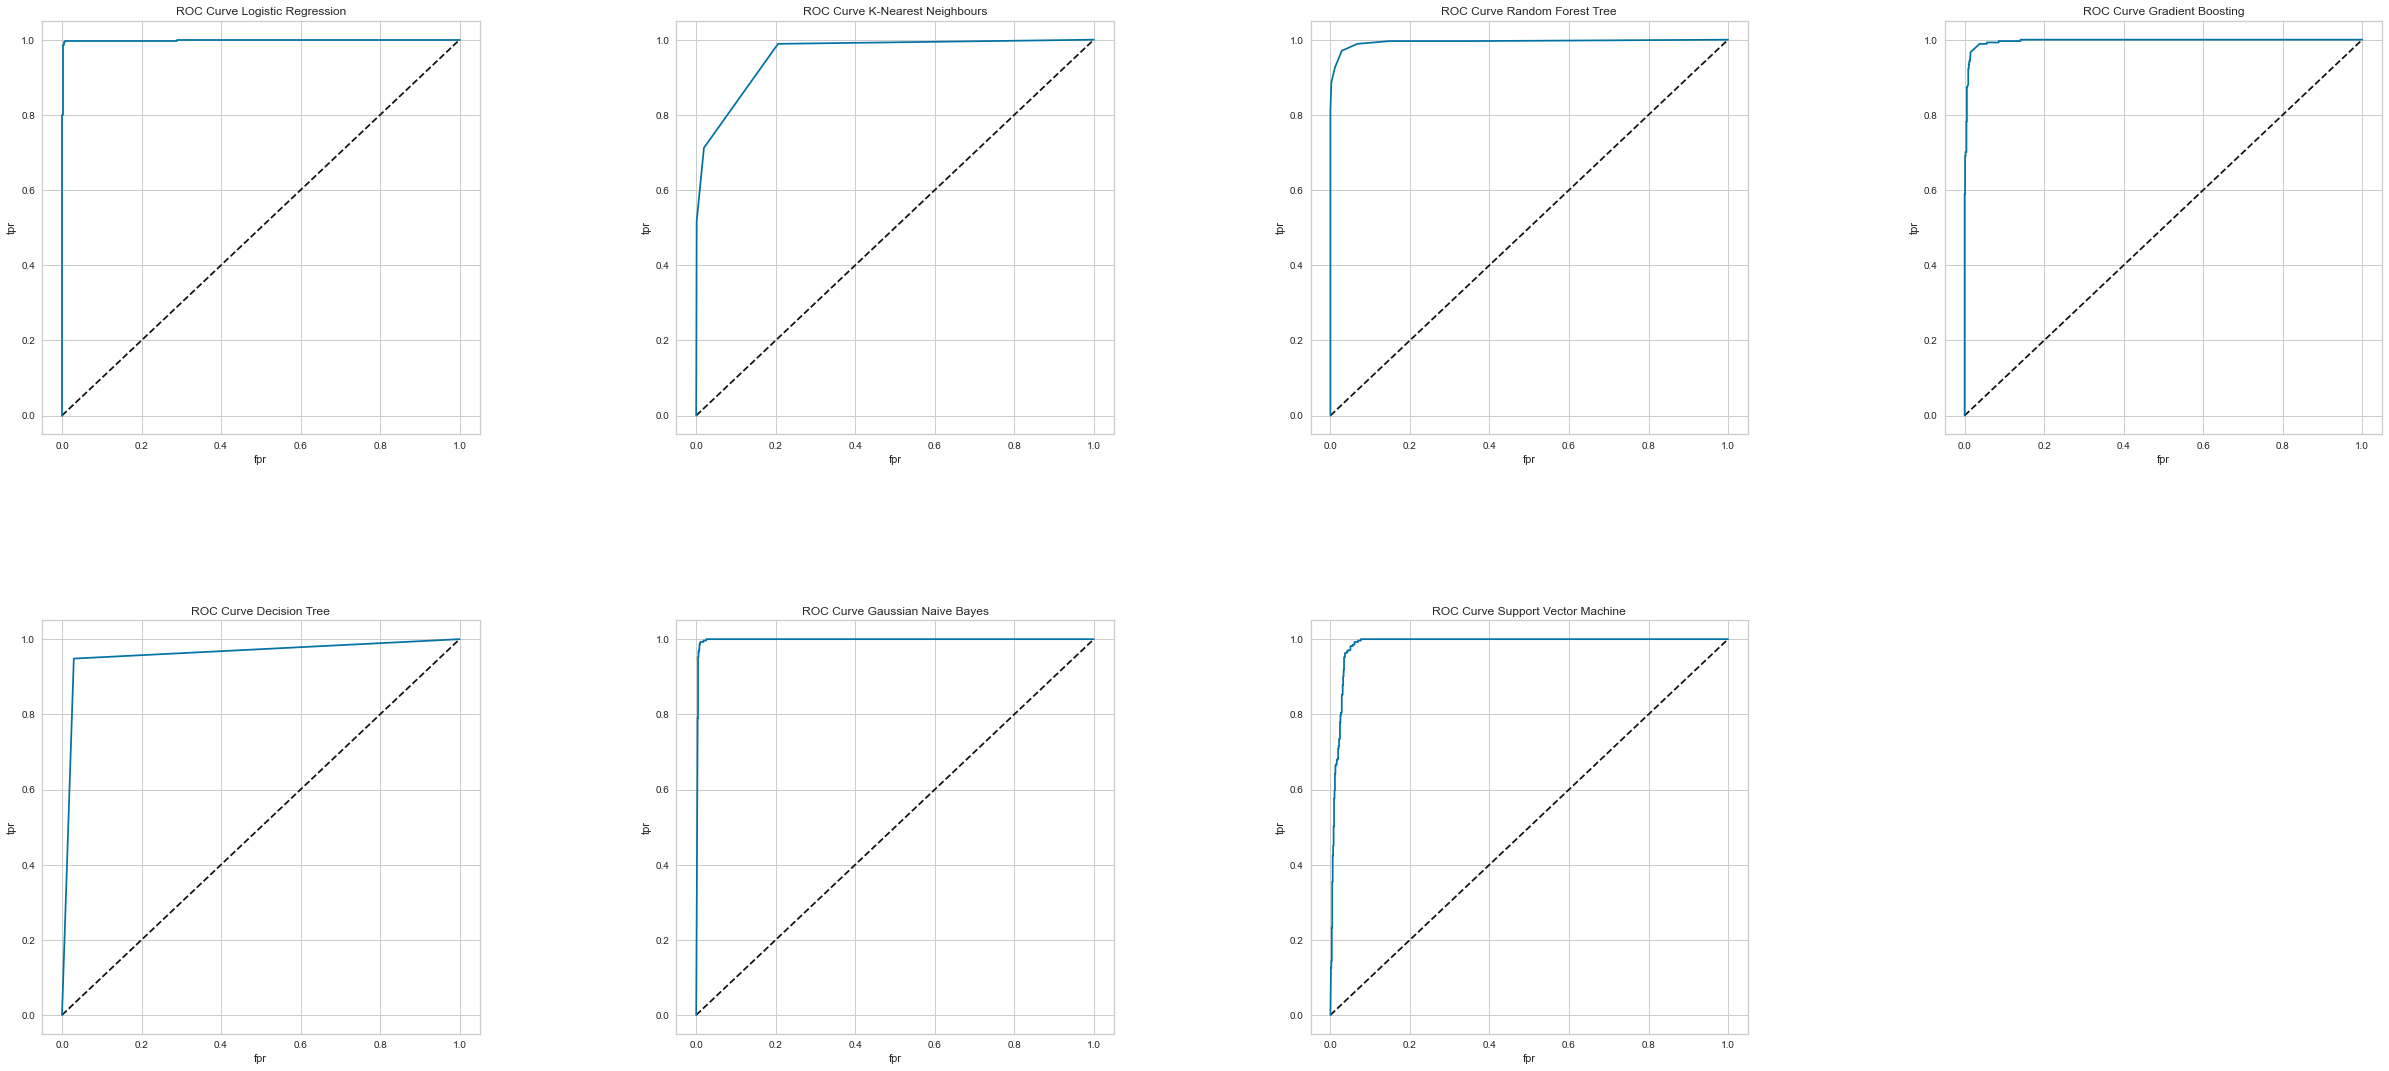

In [58]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(25,16))
# Logistic Regression Classification
Y_predict1_proba = lr.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
plt.subplot(441)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Logistic Regression')
plt.grid(True)

Y_predict1_proba = knn.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
plt.subplot(442)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve K-Nearest Neighbours')
plt.grid(True)

Y_predict1_proba = rfc.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
plt.subplot(443)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Random Forest Tree')
plt.grid(True)

Y_predict1_proba = GBR.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
plt.subplot(444)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Gradient Boosting')
plt.grid(True)

Y_predict1_proba = d_tree.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
plt.subplot(445)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Decision Tree')
plt.grid(True)

Y_predict1_proba = NB_classifier.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
plt.subplot(446)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Gaussian Naive Bayes')
plt.grid(True)

Y_predict1_proba = svm.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
plt.subplot(447)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Support Vector Machine')
plt.grid(True)

plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=1.4, hspace=0.45, wspace=0.45)
plt.show()

In [ ]:
import colorama
from colorama import Fore
email = input("Enter the email: ")
text=[email]
data_clean_ob=data_cleaning()
email_cleaned=data_clean_ob.message_cleaning(text)

vector = vectorizer.transform([email_cleaned])

result = NB_classifier.predict(vector)
print("\nResult : ",result)


if result == 1:
    print(Fore.RED + 'THIS IS A SPAM EMAIL!!')
else :
    print(Fore.GREEN + 'THIS IS A NORMAL MAIL. DONT WORRY!!')

In [ ]:
import colorama
from colorama import Fore
email = input("Enter the email: ")
text=[email]
data_clean_ob=data_cleaning()
email_cleaned=data_clean_ob.message_cleaning(text)

vector = vectorizer.transform([email_cleaned])

result = NB_classifier.predict(vector)
print("\nResult : ",result)


if result == 1:
    print(Fore.RED + 'THIS IS A SPAM EMAIL!!')
else :
    print(Fore.GREEN + 'THIS IS A NORMAL MAIL. DONT WORRY!!')

Conversation opened. 1 read message.
Skip to content Using Gmail with screen readers 1 of 244 
Happy Anniversary, Yashaswini! Inbox Swiggy <no-reply@swiggy.in> 
Unsubscribe 13:41 (4 hours ago) to me Open to read their message to you | Your first order came home on:
2019-11-08 from Classic Caterer's Your favourite restaurant of all-time:
Sweet Truth - Cake and Dessert You last ordered on: 2020-03-29 
Don't want convenience delivered to your inbox? Unsubscribe here	

Classroom LogoClassroom
Hi Yashaswini,
Dr. Anil Singh Parihar posted a new assignment in SE Lab 10-12 Friday A6-G3.

NEW ASSIGNMENTDue 28 Oct
Collaboration Diagram
Open
Posted 28 Oct by Dr. Anil Singh Parihar
Google logoGoogle LLC 1600 Amphitheatre Parkway, Mountain View, CA 94043 USA
If you do not want to receive emails from Classroom, you can unsubscribe.
